In [1]:
import collections
import inspect
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import litholog
from litholog import utils, io, defaults

In [2]:
litholog.__file__, dir(litholog)

('/home/ross/code/python/projects/litholog/litholog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

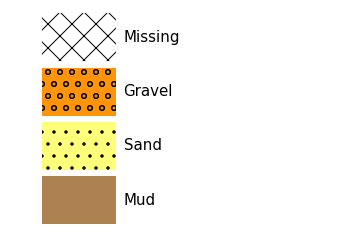

In [3]:
litholog.defaults.litholegend.plot()

# Load All Sequences

Here's a function (modified from `depstrat.data`) to load all the sequences as `BedSequence`s: 

In [14]:
# Set up some default args:

FPATH = '../data/AllBedsWithProfiles_CLEAN.csv'

# Columns to convert from strings to arrays
transforms = {c : utils.string2array_pandas for c in ['depth_m', 'grain_size_mm', 'grain_size_psi']}


# binary indicators
BINARY_FEATURES = ['snd', 'shl']


# bed data columns
FLOAT_FEATURES = [
    'th',
    'gs_tops_psi',
    'mean_gs_psi',
    'max_gs_psi',
    'grain_size_psi',
    'depth_m'
]

FEATURES = BINARY_FEATURES + FLOAT_FEATURES


# Sequence-level metadata
METACOLS = ['name', 'count', 'collection', 'eod', 'eodnum', 'ng', 'ar']


# Lithology component map
COMPONENT_MAP = ('max_gs_psi', lambda gs: defaults.gs2litho(gs, units='psi'))

In [15]:
def load_sequences(
    fpath=FPATH,
    resample=None,
    depth_col='depth_m',
    features=FEATURES,
    metacols=METACOLS,
    min_length=3
):
    """
    Load the dataset from saved csv. Return list of BedSequences.
    """
    df = pd.read_csv(fpath, converters=transforms)

    bed_seqs = []
    for name, grp in df.groupby('count'):
        seq = litholog.BedSequence.from_dataframe(
                grp,
                topcol='tops',
                basecol='bases',
                component_map=COMPONENT_MAP,
                datacols=features,
                metacols=metacols
        )
        if len(seq) >= min_length:
            bed_seqs.append(seq)

    # resample arrays if you want
    for seq in bed_seqs:
        if resample is not None:
            seq.resample_data(depth_col, resample)

    return bed_seqs

In [16]:
sequences = load_sequences()

# Check out a sequence

In [21]:
seq = random.choice(sequences)

seq

Striplog(11 Intervals, start=0.0272855480813225, stop=6.995678432506055)

In [22]:
seq.metadata

{'name': 'Golo Kco71',
 'count': 144,
 'collection': 'Golo',
 'eod': 'fan',
 'eodnum': 1,
 'ng': 0.7060719139528391,
 'ar': 0.0}

In [23]:
seq.net_to_gross

0.7060719139528393

In [24]:
seq.amalgamation_ratio

0.0

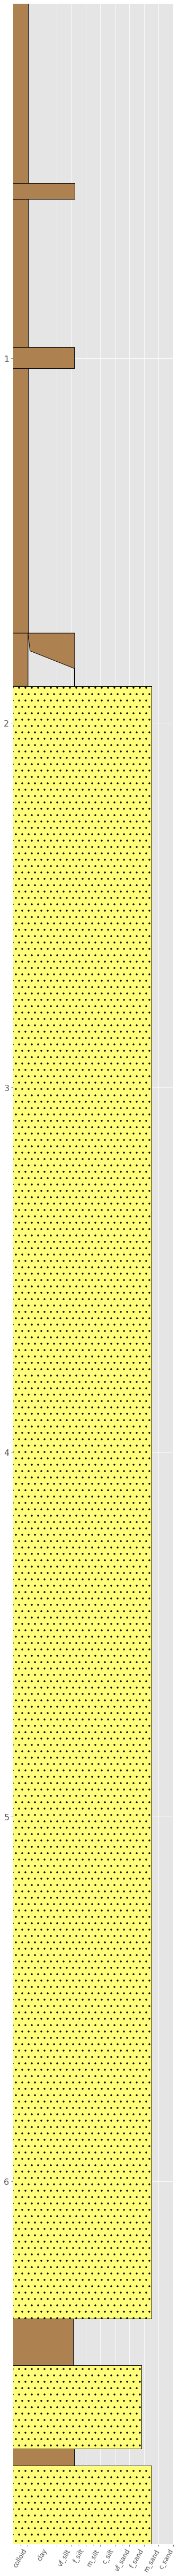

In [25]:
seq.plot(legend=defaults.litholegend, width_field='grain_size_psi', fig_width=7)

In [27]:
[print(bed, '\n') for bed in seq]

{'data': {'snd': 0.0, 'shl': 1.0, 'th': 0.4930522928134339, 'gs_tops_psi': -9.9352, 'mean_gs_psi': -9.9352, 'max_gs_psi': -9.9352, 'grain_size_psi': array([-9.9658, -9.9658]), 'depth_m': array([0.0273, 0.5203])}, 'top': Position({'middle': 0.0272855480813225, 'units': 'm'}), 'base': Position({'middle': 0.5203378408947564, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'mud'})]} 

{'data': {'snd': 0.0, 'shl': 1.0, 'th': 0.0437620378236776, 'gs_tops_psi': -6.765, 'mean_gs_psi': -6.765, 'max_gs_psi': -6.765, 'grain_size_psi': array([-6.7642, -6.7642]), 'depth_m': array([0.5203, 0.5641])}, 'top': Position({'middle': 0.520337840894757, 'units': 'm'}), 'base': Position({'middle': 0.5640998787184346, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'mud'})]} 

{'data': {'snd': 0.0, 'shl': 1.0, 'th': 0.405528217166079, 'gs_tops_psi': -9.9352, 'mean_gs_psi': -9.9352, 'max_gs_psi': -9.9352, 'grain_size_psi': array([-9.9658, -9.9658]), 'depth_m'

[None, None, None, None, None, None, None, None, None, None, None]